In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectA as im
import imagetools.provided as im1
%matplotlib notebook

I) Question 4:

<IPython.core.display.Javascript object>


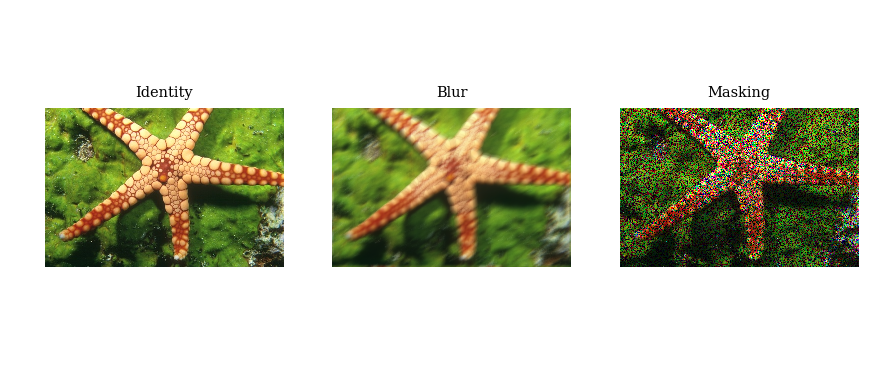

In [10]:
%matplotlib notebook
x=plt.imread('assets/starfish.png')
shape= x.shape
nu=im.kernel('motion')
H_r = im.RandomMasking(shape, 0.4)
H_b = im.Convolution(shape, nu, separable=None)
y= H_b(x)
z= H_r(x)
fig, axes = plt.subplots(ncols=3, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('Identity')
im1.show(y, ax=axes[1])
axes[1].set_title('Blur')
im1.show(z, ax=axes[2])
axes[2].set_title('Masking')
fig.show()

I) Question 5:

For the Identity operator:

In [23]:
H_i=im.Identity((24,16))
x= np.random.rand(H_i.ishape[0], H_i.ishape[1])
y= np.random.rand(H_i.oshape[0], H_i.oshape[1])
LHS= (H_i(x)*y).sum()
RHS= (H_i.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Convolution operator:

In [24]:
nu=im.kernel('motion')
H_c=im.Convolution((24,16), nu)
x= np.random.rand(H_c.ishape[0], H_c.ishape[1])
y= np.random.rand(H_c.oshape[0], H_c.oshape[1])
LHS= (H_c(x)*y).sum()
RHS= (H_c.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Random masking operator:

In [26]:
H_r=im.RandomMasking((24,16,3), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.ishape[2])
y= np.random.rand(H_r.oshape[0], H_r.oshape[1], H_r.oshape[2])
LHS= (H_r(x)*y).sum()
RHS= (H_r.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

TypeError: Cannot cast ufunc add output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

I) Question 6:
#to be implemented

II) Question 8:

In [16]:
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1],x0.shape[2])
x=im.heat_diffusion(y, 100, 1/8, scheme='implicit')

C:\Users\meher\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


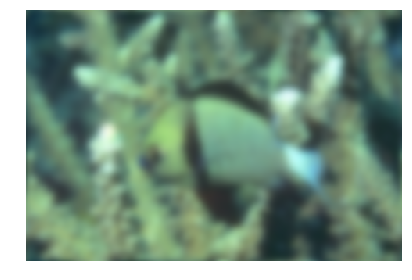

In [19]:
im1.show(x)

II) Question 13:

C:\Users\meher\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


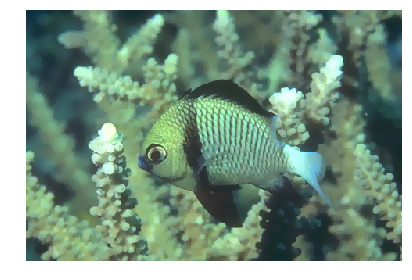

In [81]:
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1],x0.shape[2])
x, alpha=im.anisotropic_diffusion(y, 100, 1/8, g=None, return_conductivity=True)
im1.show(x)